In [59]:
import pandas as pd
import numpy as np
from datetime import datetime
from textblob import TextBlob

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.graph_objects as go
from plotly.offline import iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [60]:
#loading the scraped raw data
raw_data = pd.read_csv("reviews.csv")

In [61]:
print (raw_data.shape)

(16054, 12)


In [62]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16054 entries, 0 to 16053
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16054 non-null  object
 1   userName              16054 non-null  object
 2   userImage             16054 non-null  object
 3   content               16054 non-null  object
 4   score                 16054 non-null  int64 
 5   thumbsUpCount         16054 non-null  int64 
 6   reviewCreatedVersion  13779 non-null  object
 7   at                    16054 non-null  object
 8   replyContent          7896 non-null   object
 9   repliedAt             7896 non-null   object
 10  sortOrder             16054 non-null  object
 11  appId                 16054 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB


In [63]:
raw_data.head(3)

reviewId       userName  \
0  gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...  Mad Scientist   
1  gp:AOqpTOGG5EdQ69VnyUoJ2bJ4jB_hWqNeLh9nZ-ULOVz...       Sergey P   
2  gp:AOqpTOFP7H5aFBDA-Bd_w7e2A-19zZffNJbbH1OL-CY...  Jay Nishimura   

                                           userImage  \
0  https://lh3.googleusercontent.com/-kIZF4kMt6yY...   
1  https://lh3.googleusercontent.com/a-/AOh14GgVZ...   
2  https://lh3.googleusercontent.com/a-/AOh14GhJ7...   

                                             content  score  thumbsUpCount  \
0  Unable to register with an email. Clicking"con...      1             76   
1  Any.Forget... Had an instance of daily repeati...      1             12   
2  It works okay, But I did not consent to subscr...      1             27   

  reviewCreatedVersion                   at  \
0              5.2.0.9  2020-07-10 23:29:22   
1              5.2.0.9  2020-07-08 15:07:48   
2              5.2.0.9  2020-07-06 15:21:44   

                                        replyContent            repliedAt  \
0  We are unaware of any issues with signing in t...  2020-07-12 13:32:19   
1  Our team will be happy to look into this issue...  2020-07-09 13:49:41   
2  A payment can only be made upon the user's aut...  2020-07-07 16:31:27   

       sortOrder      appId  
0  most_relevant  com.anydo  
1  most_relevant  com.anydo  
2  most_relevant  com.anydo

In [64]:
raw_data.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
sortOrder               object
appId                   object
dtype: object

In [65]:
raw_data.groupby('appId').agg({ "content" : "count"}).reset_index()

appId  content
0                    cc.forestapp     1200
1                       com.anydo     1200
2             com.appgenix.bizcal     1200
3               com.appxy.planner     1200
4            com.artfulagenda.app      246
5   com.gmail.jmartindev.timetune     1200
6                    com.habitnow      610
7   com.habitrpg.android.habitica     1200
8          com.levor.liferpgtasks      798
9             com.microsoft.todos     1200
10         com.oristats.habitbull     1200
11              com.tasks.android     1200
12              com.ticktick.task     1200
13                    com.todoist     1200
14              prox.lab.calclock     1200

In [66]:
raw_data['at_converted'] = pd.to_datetime(raw_data["at"] ,format = "%Y-%m-%d")
raw_data['repliedAt_converted'] = pd.to_datetime(raw_data["repliedAt"] ,format = "%Y-%m-%d")


In [67]:
raw_data.groupby(['appId', 'at_converted']).agg({ "content" : "count"}).reset_index()

appId        at_converted  content
0           cc.forestapp 2020-01-22 01:30:27        1
1           cc.forestapp 2020-01-22 18:43:41        1
2           cc.forestapp 2020-01-22 23:01:57        1
3           cc.forestapp 2020-01-23 13:50:37        1
4           cc.forestapp 2020-01-23 16:53:03        1
...                  ...                 ...      ...
11022  prox.lab.calclock 2020-07-18 15:56:39        1
11023  prox.lab.calclock 2020-07-18 19:36:17        1
11024  prox.lab.calclock 2020-07-19 00:33:44        2
11025  prox.lab.calclock 2020-07-19 05:14:00        1
11026  prox.lab.calclock 2020-07-19 15:57:16        1

[11027 rows x 3 columns]

In [68]:
print (raw_data['at_converted'].min())
print (raw_data['at_converted'].max())

2014-09-28 06:18:38
2020-07-19 17:31:30


In [69]:
raw_data['difference_between_time'] = (raw_data.repliedAt_converted - raw_data['at_converted']).dt.days

In [70]:
raw_data.head()

reviewId       userName  \
0  gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...  Mad Scientist   
1  gp:AOqpTOGG5EdQ69VnyUoJ2bJ4jB_hWqNeLh9nZ-ULOVz...       Sergey P   
2  gp:AOqpTOFP7H5aFBDA-Bd_w7e2A-19zZffNJbbH1OL-CY...  Jay Nishimura   
3  gp:AOqpTOEF7Dt1m_v8AlD_EcsuXBiLKDZJxNANOVM8ohA...     Tom Larkin   
4  gp:AOqpTOF3Kb-6IdEeeYLcuUncmzjQdtNguLU5GTshqNY...    A Traveller   

                                           userImage  \
0  https://lh3.googleusercontent.com/-kIZF4kMt6yY...   
1  https://lh3.googleusercontent.com/a-/AOh14GgVZ...   
2  https://lh3.googleusercontent.com/a-/AOh14GhJ7...   
3  https://lh3.googleusercontent.com/-rQ0FefEbngc...   
4  https://lh3.googleusercontent.com/-yutN8c-KH6U...   

                                             content  score  thumbsUpCount  \
0  Unable to register with an email. Clicking"con...      1             76   
1  Any.Forget... Had an instance of daily repeati...      1             12   
2  It works okay, But I did not consent to subscr...      1             27   
3  Ruined the app by trying to get too fancy. My ...      1              7   
4  This app is a prime example of building a moun...      1             23   

  reviewCreatedVersion                   at  \
0              5.2.0.9  2020-07-10 23:29:22   
1              5.2.0.9  2020-07-08 15:07:48   
2              5.2.0.9  2020-07-06 15:21:44   
3              5.2.0.9  2020-07-03 22:50:36   
4             5.0.0.11  2020-05-09 22:50:56   

                                        replyContent            repliedAt  \
0  We are unaware of any issues with signing in t...  2020-07-12 13:32:19   
1  Our team will be happy to look into this issue...  2020-07-09 13:49:41   
2  A payment can only be made upon the user's aut...  2020-07-07 16:31:27   
3  Please note that we've recently released a new...  2020-07-07 15:59:07   
4  If you're having trouble figuring out how to t...  2020-05-12 13:52:05   

       sortOrder      appId        at_converted repliedAt_converted  \
0  most_relevant  com.anydo 2020-07-10 23:29:22 2020-07-12 13:32:19   
1  most_relevant  com.anydo 2020-07-08 15:07:48 2020-07-09 13:49:41   
2  most_relevant  com.anydo 2020-07-06 15:21:44 2020-07-07 16:31:27   
3  most_relevant  com.anydo 2020-07-03 22:50:36 2020-07-07 15:59:07   
4  most_relevant  com.anydo 2020-05-09 22:50:56 2020-05-12 13:52:05   

   difference_between_time  
0                      1.0  
1                      0.0  
2                      1.0  
3                      3.0  
4                      2.0

In [71]:
raw_data[['at_converted', 'repliedAt_converted', 'difference_between_time']]

at_converted repliedAt_converted  difference_between_time
0     2020-07-10 23:29:22 2020-07-12 13:32:19                      1.0
1     2020-07-08 15:07:48 2020-07-09 13:49:41                      0.0
2     2020-07-06 15:21:44 2020-07-07 16:31:27                      1.0
3     2020-07-03 22:50:36 2020-07-07 15:59:07                      3.0
4     2020-05-09 22:50:56 2020-05-12 13:52:05                      2.0
...                   ...                 ...                      ...
16049 2019-09-07 10:39:47                 NaT                      NaN
16050 2019-08-31 23:25:42                 NaT                      NaN
16051 2019-08-31 20:50:38                 NaT                      NaN
16052 2019-08-30 18:41:45                 NaT                      NaN
16053 2019-08-30 04:35:57                 NaT                      NaN

[16054 rows x 3 columns]

In [72]:
raw_data.dtypes

reviewId                           object
userName                           object
userImage                          object
content                            object
score                               int64
thumbsUpCount                       int64
reviewCreatedVersion               object
at                                 object
replyContent                       object
repliedAt                          object
sortOrder                          object
appId                              object
at_converted               datetime64[ns]
repliedAt_converted        datetime64[ns]
difference_between_time           float64
dtype: object

In [73]:
raw_data['difference_between_time'] = raw_data['difference_between_time'].fillna(9999)
raw_data['difference_between_time'] = raw_data['difference_between_time'].astype(int)

In [75]:
raw_data[raw_data['difference_between_time'] < 0].shape

(630, 15)

In [76]:
raw_data[raw_data['difference_between_time'] >= 0].shape

(15424, 15)

In [77]:
raw_data[(raw_data['difference_between_time'] >= 0) & (raw_data['appId'] == "com.anydo")].groupby(['appId','difference_between_time']).agg({"difference_between_time" : "count"})

difference_between_time
appId     difference_between_time                         
com.anydo 0                                            360
          1                                            240
          2                                            187
          3                                             94
          4                                             54
          5                                             28
          6                                             10
          7                                              4
          8                                              1
          9                                              1
          11                                             2
          12                                             1
          13                                             1
          14                                             1
          9999                                         187

In [78]:
appId = list(raw_data['appId'].unique())
appId

['com.anydo',
 'com.todoist',
 'com.ticktick.task',
 'com.habitrpg.android.habitica',
 'cc.forestapp',
 'com.oristats.habitbull',
 'com.levor.liferpgtasks',
 'com.habitnow',
 'com.microsoft.todos',
 'prox.lab.calclock',
 'com.gmail.jmartindev.timetune',
 'com.artfulagenda.app',
 'com.tasks.android',
 'com.appgenix.bizcal',
 'com.appxy.planner']

# Response time analysis

Text(0.5, 1.0, 'Overall Response Time')

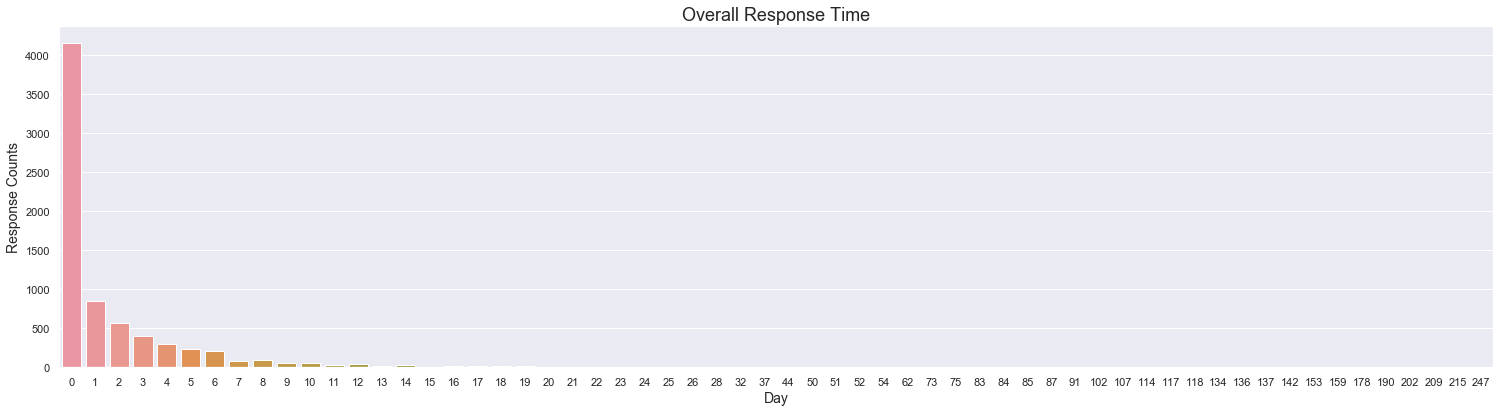

In [102]:
Response_time = raw_data[(raw_data['difference_between_time'] >= 0)  & (raw_data['difference_between_time'] != 9999.0)].\
        groupby(['difference_between_time']).agg(
                {"difference_between_time" : "count"}).unstack().reset_index(level=1).reset_index(drop = True)
Response_time.columns = ["Days", "counts"]

# tt
sns.set(rc={'figure.figsize':(25.7,6.27)})
sns.barplot(x="Days", y="counts", data=Response_time, ci=None )
plt.ylabel("Response Counts", size=14)
plt.xlabel("Day", size=14)
plt.title("Overall Response Time", size=18)

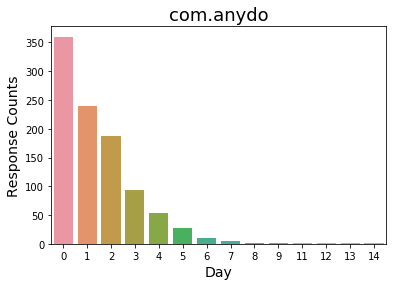

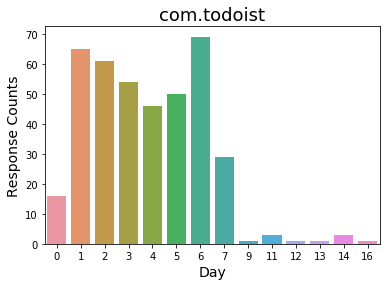

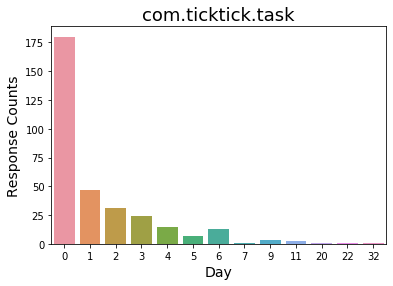

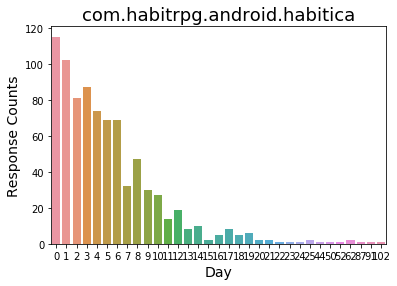

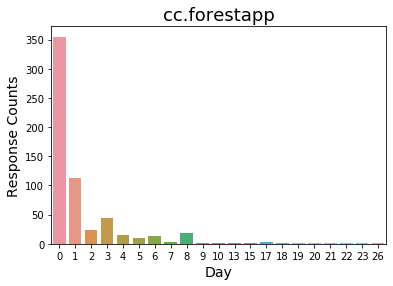

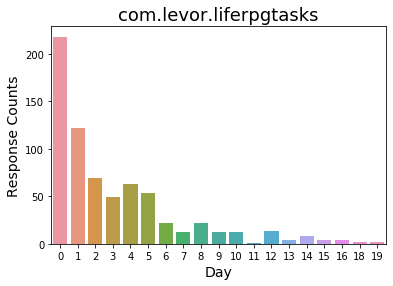

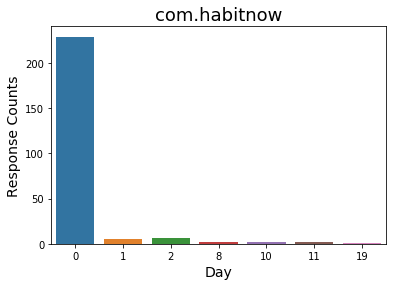

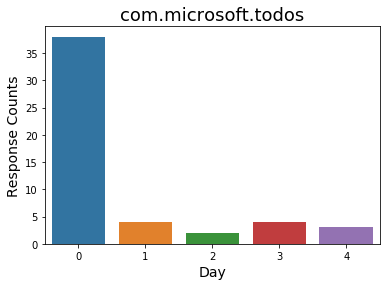

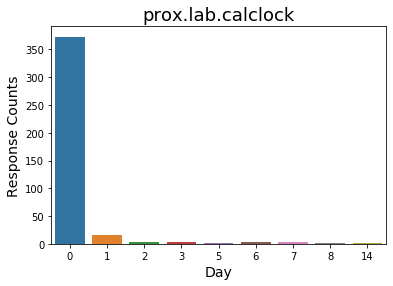

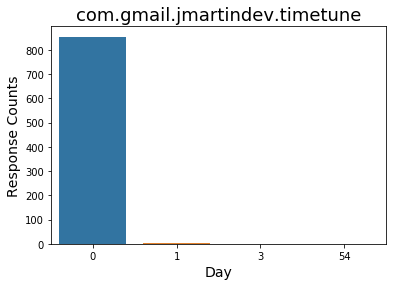

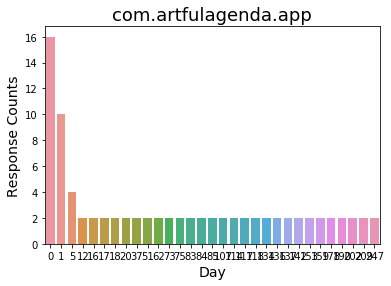

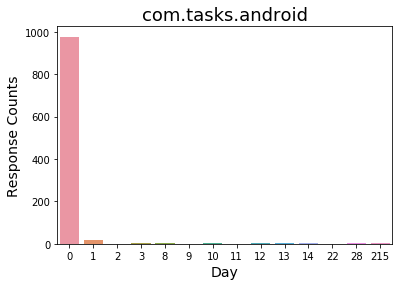

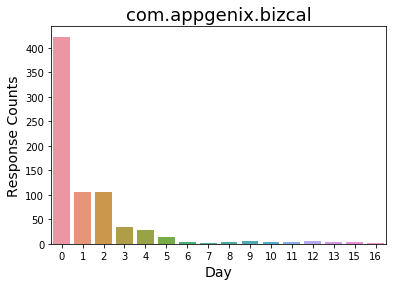

<Figure size 432x288 with 0 Axes>

In [84]:
for i in range(0,len(appId)):
#     print (appId[i])
    if ((raw_data[(raw_data['difference_between_time'] >= 0)  & (raw_data['difference_between_time'] != 9999.0) & 
         (raw_data['appId'] == appId[i])].shape[0]) > 10):

            tt = raw_data[(raw_data['difference_between_time'] >= 0)  & (raw_data['difference_between_time'] != 9999.0) & 
                 (raw_data['appId'] == appId[i])].groupby(['appId','difference_between_time']).agg(
                            {"difference_between_time" : "count"}).unstack().unstack().unstack().reset_index(level=1).reset_index(drop = True)
            tt.columns = ["Days", "counts"]

            # plt.figure(figsize=(10, 8))
            sns.barplot(x="Days", y="counts", data=tt, ci=None )
            plt.ylabel("Response Counts", size=14)
            plt.xlabel("Day", size=14)
            plt.title(appId[i], size=18)
            plt.figure()
    # plt.savefig("barplot_Seaborn_barplot_Python.png")

# Sentiment Polarity Distribution

In [20]:
# Removing the unwanted tags and stops words
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText


In [21]:
raw_data['content Text'] = preprocess(raw_data['content'])

#creating the polarity based on the users review contents
raw_data['polarity'] = raw_data['content Text'].map(lambda text: TextBlob(text).sentiment.polarity)
raw_data['review_len'] = raw_data['content Text'].astype(str).apply(len)
raw_data['word_count'] = raw_data['content Text'].apply(lambda x: len(str(x).split()))

In [22]:
#create a deep copy 
df = raw_data.copy(deep = True)

In [23]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['content Text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Great program! It keeps me organized. I label my categories after days of the week. Then I organize my days by puting my todos as subcategories. What ever one's I can't accomplish this program has a feature that allows my to move it.
Best app to do everything in synchronized way.. 🤩🤩
Best on the market!
This is one of the best I have ever had.
Best


In [24]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['content Text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Please add location-based reminders and missed call reminders
Can't log in. The password input is shorter on the in-app login than both the reset password field as well as the login form on web, so my correct password is rejected
If i remove the app from recents then if i open another app it opens without any notification about the tree....fix this soon
Reminder didnt work on Vivo
I cannot even create an account I fill in what's needed and I'm pressing the button and it's not working some1 help.


In [25]:
print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1, ['content Text']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

Horrible app it is. It keeps stopping over & over. Don't know what's the issue. I have already uninstalled, but still problem persists.
Worst apk reminder not work


In [104]:
for i in range(0,len(appId)):
    df[df['appId'] == appId[i]]['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution for the app ' + appId[i])

In [103]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Overall Sentiment Polarity Distribution')

In [121]:
df['score'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [122]:
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [129]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [ ]:
# df.groupby('Department Name').count()['Clothing ID'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
#                                                            title='Bar chart of Department Name', xTitle='Department Name')

In [130]:
#####################################################################################################

In [29]:
from sklearn.feature_extraction.text import CountVectorizer


In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



In [31]:
common_words = get_top_n_words(df['content Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

the 22580
to 20427
it 16604
and 12619
app 11740
is 8412
for 8161
this 7289
but 6386
of 6315
my 6083
you 5481
that 5311
in 4913
not 4626
have 4368
on 4057
be 3714
can 3585
with 3564


In [32]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [35]:
df2

ReviewText  count
0         app  11740
1       tasks   2834
2        like   2834
3         use   2562
4        time   2518
5        good   2353
6       great   2218
7        just   2212
8    calendar   1933
9        task   1864
10     really   1863
11        day   1833
12       list   1716
13       love   1662
14       work   1555
15    version   1532
16        don   1429
17        add   1299
18     widget   1171
19      doesn   1170

In [36]:
common_words = get_top_n_words(df['content Text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

df2[df2['ReviewText']!="app"].groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')
# remove app

app 11740
tasks 2834
like 2834
use 2562
time 2518
good 2353
great 2218
just 2212
calendar 1933
task 1864
really 1863
day 1833
list 1716
love 1662
work 1555
version 1532
don 1429
add 1299
widget 1171
doesn 1170


In [142]:
# N_gram function
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [143]:
common_words = get_top_n_bigram(df['content Text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')


the app 3327
this app 3223
to do 1373
to use 1316
of the 1244
in the 1199
app is 1165
to be 1081
it is 967
this is 938
have to 936
for the 909
app but 859
would be 851
to the 846
but it 843
you can 840
on the 833
if you 784
and it 752


In [144]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [145]:
common_words = get_top_n_bigram(df['content Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')


great app 703
good app 539
love app 503
easy use 486
google calendar 405
free version 371
pro version 321
like app 314
doesn work 293
use app 266
using app 261
premium version 221
app great 212
nice app 202
app really 199
really like 194
open app 184
app good 184
calendar app 183
user friendly 168


In [146]:
# The distribution of Top trigrams before removing stop words


In [147]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['content Text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')


this app is 509
easy to use 481
the app is 428
it would be 353
love this app 337
to do list 330
be able to 328
the free version 260
the pro version 230
the app and 225
to be able 213
you have to 213
this app but 205
the ability to 203
this app for 198
of the app 191
like this app 180
to use it 178
on my phone 178
to use and 173


In [148]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['content Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')


really like app 86
app easy use 53
sync google calendar 45
really love app 44
really good app 43
simple easy use 42
using app years 37
deep focus mode 37
paid pro version 37
buy pro version 37
app keeps crashing 34
app ve used 34
bought pro version 33
bought premium version 32
ve using app 31
used love app 30
widget home screen 30
just started using 30
used app years 29
using free version 28


In [152]:
# Part-Of-Speech Tagging (POS)

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [153]:
blob = TextBlob(str(df['content Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

# Polarity analysis w.r.t the users scores

In [106]:
x0 = df.loc[df['score'] == 1, 'polarity']
x1 = df.loc[df['score'] == 2, 'polarity']
x2 = df.loc[df['score'] == 3, 'polarity']
x3 = df.loc[df['score'] == 4, 'polarity']
x4 = df.loc[df['score'] == 5, 'polarity']


trace1 = go.Histogram(
    x=x0, name='score 1',
    opacity=0.75
)

trace2 = go.Histogram(
    x=x1, name = 'score 2',
    opacity=0.75
)

trace3 = go.Histogram(
    x=x2, name = 'score 3',
    opacity=0.75
)

trace4 = go.Histogram(
    x=x3, name = 'score 4',
    opacity=0.75
)

trace5 = go.Histogram(
    x=x4, name = 'score 5',
    opacity=0.75
)




data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(barmode='overlay', title='Overall Distribution of Sentiment polarity of reviews based on Scores')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [49]:
#function for plot polarity vs scores w.r.t the app
def polarity(df,appId ):
    x0 = df.loc[df['score'] == 1, 'polarity']
    x1 = df.loc[df['score'] == 2, 'polarity']
    x2 = df.loc[df['score'] == 3, 'polarity']
    x3 = df.loc[df['score'] == 4, 'polarity']
    x4 = df.loc[df['score'] == 5, 'polarity']


    trace1 = go.Histogram(
        x=x0, name='score 1',
        opacity=0.75
    )

    trace2 = go.Histogram(
        x=x1, name = 'score 2',
        opacity=0.75
    )

    trace3 = go.Histogram(
        x=x2, name = 'score 3',
        opacity=0.75
    )

    trace4 = go.Histogram(
        x=x3, name = 'score 4',
        opacity=0.75
    )

    trace5 = go.Histogram(
        x=x4, name = 'score 5',
        opacity=0.75
    )

    data = [trace1, trace2, trace3, trace4, trace5]
    layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Scores for the app' + appId)
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename='overlaid histogram')

In [50]:
for i in range(0,len(appId)):
    polarity(df[df['appId'] == appId[i]],appId[i] )